In [60]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

 
df = pd.read_csv('electricity.csv')

# 


In [61]:
df

,unique_id,ds,y,Exogenous1,Exogenous2
0,BE,10/22/2016 0:00,70.000000,49593.0,57253.0
1,BE,10/22/2016 1:00,37.100000,46073.0,51887.0
2,BE,10/22/2016 2:00,37.100000,44927.0,51896.0
3,BE,10/22/2016 3:00,44.750000,44483.0,48428.0
4,BE,10/22/2016 4:00,37.100000,44338.0,46721.0
...,...,...,...,...,...
8395,PJM,12/23/2018 19:00,32.461970,98288.0,11711.0
8396,PJM,12/23/2018 20:00,32.052179,97194.0,11637.0
8397,PJM,12/23/2018 21:00,27.632347,94319.0,11433.0
8398,PJM,12/23/2018 22:00,24.746053,90106.0,11108.0


In [74]:
# Count the number of occurrences of each unique ID in the dataframe
df.unique_id.value_counts()

BE     1680
DE     1680
FR     1680
NP     1680
PJM    1680
Name: unique_id, dtype: int64

In [76]:
# Filter the dataframe to include only rows where the 'unique_id' is "DE"
df = df[df['unique_id'] == "DE"]
df

,unique_id,ds,y,Exogenous1,Exogenous2
1680,DE,2017-10-22 00:00:00,19.10,587.25,16972.75
1681,DE,2017-10-22 01:00:00,19.03,623.00,16254.50
1682,DE,2017-10-22 02:00:00,16.90,650.00,15940.25
1683,DE,2017-10-22 03:00:00,12.98,687.25,15959.50
1684,DE,2017-10-22 04:00:00,9.24,717.25,16071.50
...,...,...,...,...,...
3355,DE,2017-12-30 19:00:00,16.18,1519.50,19326.00
3356,DE,2017-12-30 20:00:00,11.13,1526.75,18135.25
3357,DE,2017-12-30 21:00:00,4.62,1514.75,17631.50
3358,DE,2017-12-30 22:00:00,4.71,1484.75,17553.75


In [77]:
df['ds'] = pd.to_datetime(df['ds'])
data = df[['y', 'Exogenous1', 'Exogenous2']].values

scaler = MinMaxScaler()
data = scaler.fit_transform(data)

 
X = data[:, 1:]   
y = data[:, 0]   


In [78]:
 
def create_sequences(X, y, seq_length):
    sequences = []
    labels = []
    for i in range(len(X) - seq_length):
        sequences.append(X[i:i+seq_length])
        labels.append(y[i+seq_length])
    return torch.FloatTensor(sequences), torch.FloatTensor(labels)

seq_length = 3# 24 saatlik geçmiş veriyi kullanarak tahmin yapalım
X_seq, y_seq = create_sequences(X, y, seq_length)


X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.3, shuffle=False)


In [79]:
from torch.utils.data import DataLoader, TensorDataset
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [80]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchtsmixer import TSMixer

In [81]:
X_test.shape

torch.Size([504, 3, 2])

In [82]:
for x,y in train_loader:
    print(x.shape)
    print(y.shape)

torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])


In [83]:
for x,y in test_loader:
    print(x.shape)
    print(y.shape)

torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([24, 3, 2])
torch.Size([24])


In [84]:
sequence_length = 3
prediction_length = 1 
input_channels = 2 
output_channels = 1  

In [85]:
model = TSMixer(sequence_length, prediction_length, input_channels, output_channels)
criterion = nn.MSELoss()  
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [86]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
X_train, y_train = X_train.to(device), y_train.to(device)
num_epochs = 10000
for epoch in range(num_epochs):
    model.train()

    optimizer.zero_grad()
    outputs = model(X_train)  
    outputs = outputs.squeeze()  
    loss = criterion(outputs, y_train)  
    loss.backward()
    optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print("Eğitim tamamlandı")


Epoch [1/10000], Loss: 1.1112
Epoch [2/10000], Loss: 1.0986
Epoch [3/10000], Loss: 1.1139
Epoch [4/10000], Loss: 1.1056
Epoch [5/10000], Loss: 1.1045
Epoch [6/10000], Loss: 1.1038
Epoch [7/10000], Loss: 1.0981
Epoch [8/10000], Loss: 1.1023
Epoch [9/10000], Loss: 1.1068
Epoch [10/10000], Loss: 1.1027
Epoch [11/10000], Loss: 1.0947
Epoch [12/10000], Loss: 1.0973
Epoch [13/10000], Loss: 1.0887
Epoch [14/10000], Loss: 1.0877
Epoch [15/10000], Loss: 1.0986
Epoch [16/10000], Loss: 1.0872
Epoch [17/10000], Loss: 1.0749
Epoch [18/10000], Loss: 1.0784
Epoch [19/10000], Loss: 1.0788
Epoch [20/10000], Loss: 1.0781
Epoch [21/10000], Loss: 1.0681
Epoch [22/10000], Loss: 1.0724
Epoch [23/10000], Loss: 1.0738
Epoch [24/10000], Loss: 1.0702
Epoch [25/10000], Loss: 1.0626
Epoch [26/10000], Loss: 1.0628
Epoch [27/10000], Loss: 1.0741
Epoch [28/10000], Loss: 1.0647
Epoch [29/10000], Loss: 1.0593
Epoch [30/10000], Loss: 1.0570
Epoch [31/10000], Loss: 1.0483
Epoch [32/10000], Loss: 1.0459
Epoch [33/10000],

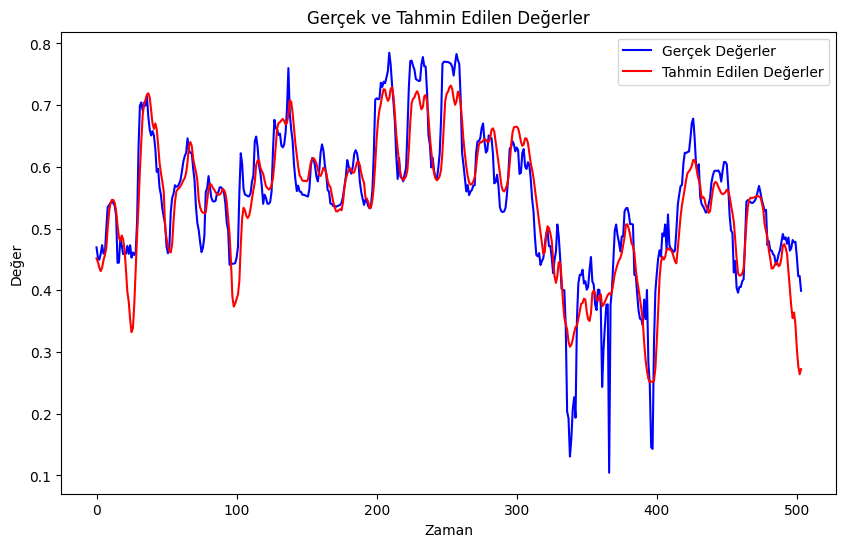

In [87]:
import torch
import matplotlib.pyplot as plt

X_test = X_test.to(device)
y_test = y_test.to(device)
model.eval()

with torch.no_grad():
    test_outputs = model(X_test).squeeze() 
    test_outputs = test_outputs.cpu().numpy()  
    y_test_np = y_test.cpu().numpy()  


plt.figure(figsize=(10,6))
plt.plot(y_test_np, label='Gerçek Değerler', color='b')
plt.plot(test_outputs, label='Tahmin Edilen Değerler', color='r')
plt.title('Gerçek ve Tahmin Edilen Değerler')
plt.xlabel('Zaman')
plt.ylabel('Değer')
plt.legend()
plt.show()
